In [19]:
# ElectroCardioGraphy 
## Electrocardiography is a process or a method which records electrical activity of the heart againt time ##
## working : the electrodes are placed on chest and limbs . The main function of these are to capture the difference in the
#potential difference of the myocardial fibre 
#ECG is composite from 5 waves - P, Q, R, S and T.Signals are measured from the ECG signal . 
#The main peak of the jupyter notebook is as below




In [24]:
%%html 
<img src='QRSWave.png',width=10,height=10>

In [ ]:
##The steps for analysis of ECG are as belows
### 1 . Signal Acquisition : 
#The raw signal acquired are amplified and converted to digital form .This produces noise like power sample and breathing 
#sample artifact [2].
### 2. Digital signal processing with digital filters : 
## The filters remove the noise from the signal through filtering techniques. 
##The  main  noise  elements  are  power  supply  network  50  Hz  frequency  and  breathing  muscle movements. After the basic
##filtering R peaks are detected . R peaks are necessary for heart rate detection[1].
## 3. Heart Rate Detection Algorithm : Some heart rate algorithm are used to detect the rate on statistical  and  
##differential  mathematical methods [1].The QRS complex is the most striking waveform within the electrocardiogram (ECG).
#There are many algorithms for QRS detection like Derivative based algorithm ,wavelet based algorithm to name a few [3].
## 4. Application of designed algorithms : After finding the heart rate frequency we can use this to for many applications like
## like stress test etc.

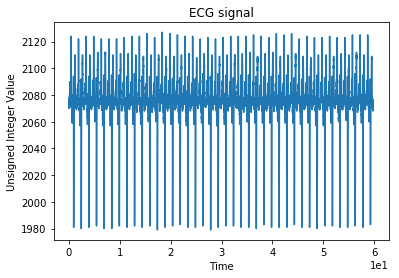

In [71]:
#import files
# Question 4
%matplotlib inline

#now we import different packages that will allow to do math, linear algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy import signal
from __future__ import division
from matplotlib import gridspec
#from biosppy.signals import ecg
#open the file
File_Location_And_Name =open("aami3a.dat",'rb')

All_signals = np.fromfile(File_Location_And_Name,dtype=np.uint16)
Length_Of_Signals = len(All_signals)
fs = 720.
Ts = 1/fs
File_arrange = np.arange(0,Length_Of_Signals/fs,Ts)

#out = ecg.ecg(signal=All_signals,sampling_rate=fs,show=True)
plt.plot(File_arrange,All_signals)
plt.title('ECG signal')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))




In [72]:
# question 5
#suppose a person has 90 heart beats per minute then we need to plot samples for 90/60(1.5 beats per sec ) and 
#signal delay/acquisition of .5 sec (for example) so the total time taken is (1.5 * 5 +.5) = 8 secs
#  The number of samples taken per sec is the sampling Rate 
# Fs = N/Time in seconds 
# where N is the no of samples ,Fs is the sampling frequency 
#N = Fs*(No of seconds)
#N = 720*8 = 5760
#Calculating for 60 beats per min
# N = 720*5 =3600
# but in the figure below when we take 3600 sample we get only 4 beats, this is because of a delay in the signal due to factors
#like signal acquisition , noise etc
# So to find 5 beats we compute for 6 and 7 seconds (the 7 second one shows 5 beats per second) 


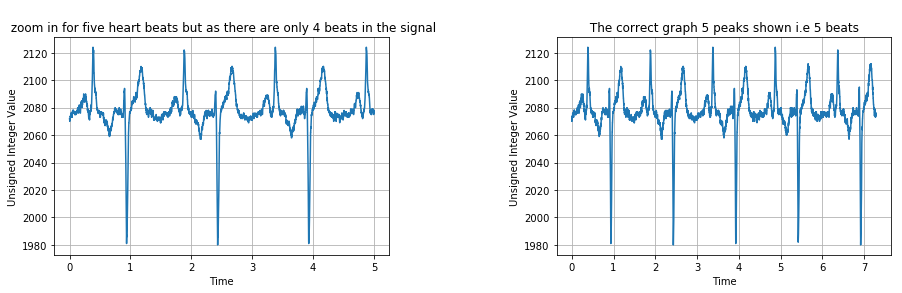

In [76]:
# Question No 6
fig=plt.figure()
fig.set_size_inches((15,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
No_Of_Samples = 3600
#for plotting we first arrange the following
Array_List_For_ZoomIn = np.arange(0,No_Of_Samples/fs,1/fs)
Plot_Sample = fig.add_subplot(plt.subplot(gs[0,0]))
Plot_Sample.plot(Array_List_For_ZoomIn,All_signals[:No_Of_Samples])
Plot_Sample.set_title('\n zoom in for five heart beats but as there are only 4 beats in the signal')
Plot_Sample.set_xlabel('Time')
Plot_Sample.set_ylabel('Unsigned Integer Value')
Plot_Sample.grid()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

No_Of_Samples_Correct = 5250 # taking 2 sec 
Array_List_For_ZoomIn_R = np.arange(0,No_Of_Samples_Correct/fs,1/fs)
Plot_Sam = fig.add_subplot(plt.subplot(gs[0,1]))
Plot_Sam.plot(Array_List_For_ZoomIn_R,All_signals[:No_Of_Samples_Correct])
Plot_Sam.set_title('\n The correct graph 5 peaks shown i.e 5 beats ')
Plot_Sam.set_xlabel('Time')
Plot_Sam.set_ylabel('Unsigned Integer Value')
Plot_Sam.grid()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


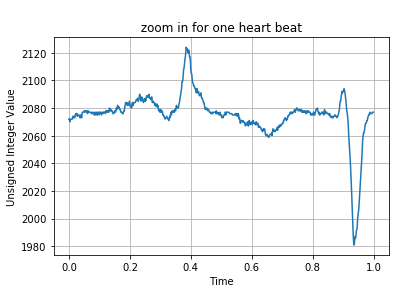

In [75]:
Array_List_For_One_Heart_Beat = np.arange(0,1,1/fs)
plt.plot(Array_List_For_One_Heart_Beat,All_signals[:720])
plt.title('\n zoom in for one heart beat ')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()

In [58]:
# Question No 7
#The QRS peak is small so the individual has a low blood pressure

In [82]:
#Question No 8
r=np.arange(43081)
B=0
x=np.amax(All_signals[:720])
print 'QRS peak is ' +str (x)
for index in r:
    if All_signals[index]>=2124:
        B=B+1
print 'Heart beats per minute is ' +str(B)   

QRS peak is 2124
Heart beats per minute is 51


In [ ]:
# Question no 9 and 10
Remove_DC_Component = All_signals - np.mean(All_signals)
FFT_Transform = np.fft.fft(Remove_DC_Component)
FFT_Transform = abs(FFT_Transform) #converts it into amplitude
FFT_Transform = FFT_Transform/len(Remove_DC_Component)
Frequency_Plotting = np.arange(0,fs/2,fs/Length_Of_Signals)

plt.subplot(111)
plt.plot(Frequency_Plotting,FFT_Transform[:21541])
plt.grid()
plt.title('DFT of line ')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Unsigned Integer Value',fontsize=14)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#maximum frequency 
Frequency =  np.amax(FFT_Transform[:21541])
FrequencyValue = str(Frequency)
print "The maximum frequency is : " + FrequencyValue
The_Range_Of_Samples = np.arange(21541)
for each in The_Range_Of_Samples:
    if FFT_Transform[each]>= 4.98:
        print 'Maximum is observed at f=' +str(each/57.44)  
        break 
  



In [61]:
#Question 11 , 12 ,13
#Heart Rate = beats per min or 60/(R-R interval)  


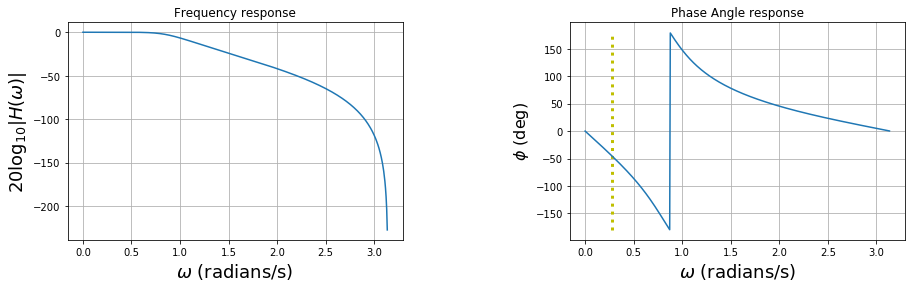

In [62]:
#Question 14 ,15,16 
# Given Cutoff frequncy = 100 hz
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

MaxFrequency=fs/2
cutoff= 100
Wn=100/MaxFrequency # Reference [4] Wn is in half-cycles / sample so we find maxfrequency
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a) # finding the frequency response of the filtered signal
Filter_Signal=signal.lfilter(b,a,Remove_DC_Component) #Filter data along one-dimension with an IIR or FIR filter.

#Plotting Frequency response
Initial_Fig = fig.add_subplot(plt.subplot(gs[0,0]))
Initial_Fig.plot(w, 20 * np.log10(abs(h)))
Initial_Fig.set_title('Frequency response')
Initial_Fig.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
Initial_Fig.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
Initial_Fig.grid()
#Angle Response
Phase_Response = fig.add_subplot(plt.subplot(gs[0,1]))
Phase_Response.plot(w,np.angle(h)/np.pi*180)
Phase_Response.set_title('Phase Angle response')
Phase_Response.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
Phase_Response.set_ylabel(r"$\phi $ (deg)",fontsize=16)
Phase_Response.vlines(Wn,-180,180,linestyles=':',color='y',lw=3.)
Phase_Response.grid()




Peak in DFT data is 4.9816013693
Maximum is observed at f=1.39275766017


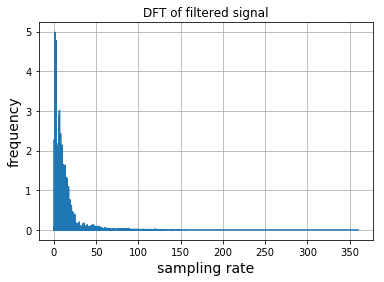

In [69]:
fig=plt.figure()
fig.set_size_inches((15,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

Length_Of_Filtered_Signal=len(Filter_Signal)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
ff=Frequency_Plotting
FFT_Of_Filtered_Signal=np.fft.fft(Filter_Signal)
FFT_Of_Filtered_Signal=abs(FFT_Of_Filtered_Signal)/Length_Of_Filtered_Signal
Initial_Fig = fig.add_subplot(plt.subplot(gs[0,0]))
Initial_Fig.plot(Frequency_Plotting, FFT_Of_Filtered_Signal[:21541])
Initial_Fig.set_title('DFT of filtered signal')
Initial_Fig.set_ylabel("frequency",fontsize=14)
Initial_Fig.set_xlabel('sampling rate',fontsize=14)
Initial_Fig.grid()
p=np.amax(FFT_Of_Filtered_Signal[:21540])
print 'Peak in DFT data is ' +str(p)
L2=np.arange(21540)
for index in L2:
    if FFT_Of_Filtered_Signal[index]>=4.98:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 

In [ ]:
#Bibiliography
#[1]ECG Signal Processing, Classification and Interpretation: A Comprehensive Framework of Computational Intelligence 
#Adam Gacek Witold Pedrycz London : Springer-Verlag London Limited, 2012. Page no 1,2 
#[2] ECG Signal Processing and Heart Rate Frequency Detection Methods, Conference Paper November 2011 
#Conference: Technical Computing 2011,Prague , Jakub Parák, Jan Havlík
#[3] The principles of software QRS detection - IEEE Engineering in Medicine and Biology Magazine Bert-Uwe Köhler, Carsten Hennig, Reinhold Orglmeister
#Department of Electrical Engineering, Biomedical Electronics Group, Berlin University of Technology 
#[4] scipy docs :https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html
